## The Dataset
* Column 1 is weight
* Column 2 is feed type

## The data looks like this:

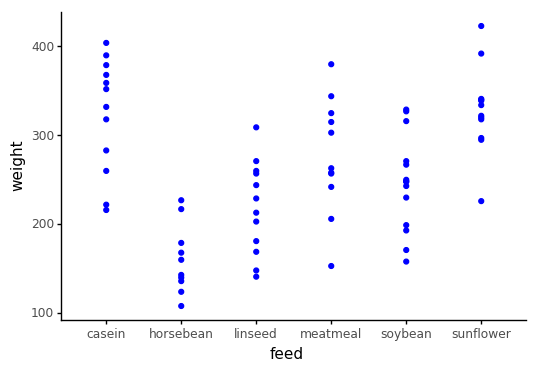

<ggplot: (16069457)>


In [3]:
import pandas
chicks = pandas.read_csv("chickwts.txt")
import plotnine
from plotnine import *
p=(ggplot(data=chicks) +
    aes(x="feed",y="weight") +
    geom_point(color="blue") +
    theme_classic())
print p

## Is chick weight different when they're fed soybean feed vs sunflower feed?
### Hypotheses:
* Null hypothesis: There's no difference

In [36]:
def null(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll= -1*scipy.stats.norm(expected,sigma).logpdf(obs.weight).sum()
    return nll

* Alternate hypothesis:

In [37]:
def alter(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expected=B0+B1*obs.x # error?
    nll= -1*scipy.stats.norm(expected,sigma).logpdf(obs.weight).sum()
    return nll

### Then we have to subset the data to only include chicks fed soybeans or sunflowers:
#### Note: Must change feed names to integers so that numpy can understand
* soybean=0
* sunflower=1

In [38]:
chicks = pandas.read_csv("chickwts.txt")

#fixed subset
subset1 = chicks.loc[chicks['feed'].isin(['sunflower','soybean'])]
subset1['x'] = [0 if ele  == "soybean" else 1 for ele in subset1["feed"]]



C:\Users\NicCage\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Let's test it using a likelihood ratio test!
#### First import your packages

In [39]:
import numpy
import scipy
from scipy import optimize
from scipy import stats
from scipy.stats import norm


#### The fit

In [40]:
initialGuess=numpy.array([1,1])
alterGuess=numpy.array([1,1,1])
fitNull=scipy.optimize.minimize(null,initialGuess,method="Nelder-Mead",options={'disp':True},args=subset1)
fitAlter=scipy.optimize.minimize(alter,alterGuess,method="Nelder-Mead",options={'disp':True},args=subset1)
print(fitNull)
print(fitAlter)

Optimization terminated successfully.
         Current function value: 145.240592
         Iterations: 85
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 138.469162
         Iterations: 200
         Function evaluations: 363
 final_simplex: (array([[ 284.49999051,   64.53691755],
       [ 284.49994818,   64.53700563],
       [ 284.50008783,   64.53694034]]), array([ 145.2405921,  145.2405921,  145.2405921]))
           fun: 145.24059209701645
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 85
        status: 0
       success: True
             x: array([ 284.49999051,   64.53691755])
 final_simplex: (array([[ 246.42855057,   82.48813575,   49.73948886],
       [ 246.42852198,   82.48806896,   49.73943687],
       [ 246.42847238,   82.48817448,   49.73945349],
       [ 246.42854646,   82.48810237,   49.73950669]]), array([ 138.46916182,  138.46916182,  138.46916182,  138.46916182]))
   

#### The results

In [43]:
D=2*(fitNull.fun-fitAlter.fun)
print "result"
print 1-scipy.stats.chi2.cdf(x=D,df=1)

result
0.000233176728695


# sunflower seed sig increases weight!